In [17]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
# Load dataframe (already preprocessed to weather-only, etc)
df = pd.read_csv("atis_dataset_converted.csv", sep=";")
label_cols = ["ILS", "RNAV", "RNP", "VISUAL"]

# define features and targets
X = df.drop(columns=label_cols)

y = df[label_cols]

In [19]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

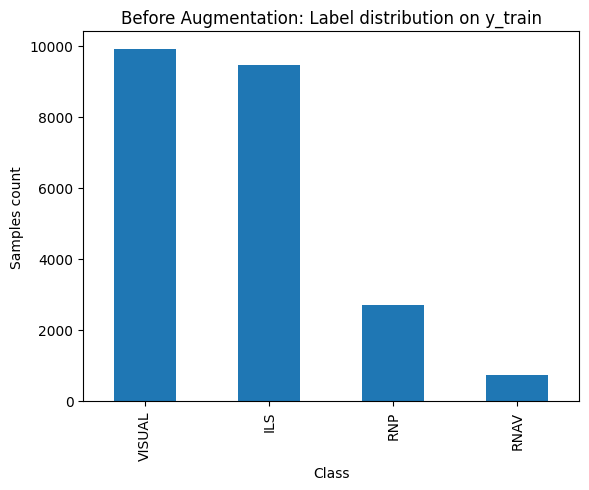

Label distribution:
 VISUAL    9910
ILS       9457
RNP       2718
RNAV       734
dtype: int64


In [20]:
# check for label distribution
label_counts = y_train.sum().sort_values(ascending=False)
label_counts.plot(kind='bar')
plt.title('Before Augmentation: Label distribution on y_train')
plt.xlabel('Class')
plt.ylabel('Samples count')
plt.show()

print("Label distribution:\n", label_counts)

In [21]:
# Count positives per label
positive_counts = {label: df[label].sum() for label in label_cols}
print("Positives per label:", positive_counts)

Positives per label: {'ILS': np.int64(11847), 'RNAV': np.int64(914), 'RNP': np.int64(3403), 'VISUAL': np.int64(12355)}


In [22]:
# Find the largest class size
max_count = max(positive_counts.values())

In [23]:
# oversample each label
frames = []

for label in label_cols:
    # All rows where this label is positive (1)
    df_pos = df[df[label] == 1]
    # Upsample to max_count for this label (with replacement)
    df_pos_upsampled = resample(
        df_pos,
        replace=True,
        n_samples=max_count,
        random_state=42
    )
    frames.append(df_pos_upsampled)

In [24]:
# Concatenate, then drop duplicates (since some rows may be positive for >1 label)
df_balanced = pd.concat(frames).drop_duplicates().reset_index(drop=True)

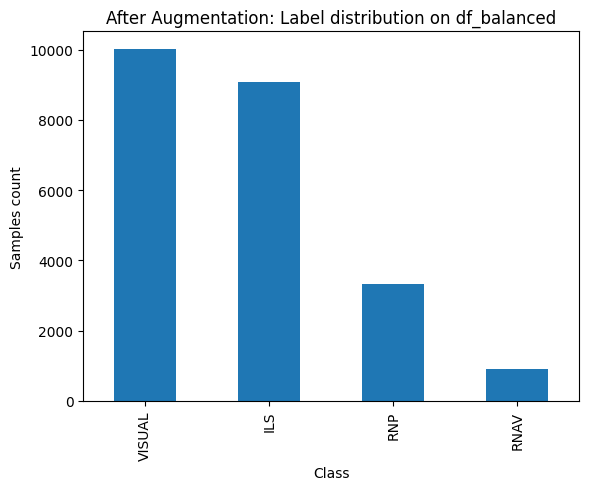

Label distribution (augmented):
 VISUAL    10013
ILS        9074
RNP        3344
RNAV        914
dtype: int64


In [25]:
# check for label distribution after augmentation
y_balanced = df_balanced[label_cols]
label_counts_balanced = y_balanced.sum().sort_values(ascending=False)

label_counts_balanced.plot(kind='bar')
plt.title('After Augmentation: Label distribution on df_balanced')
plt.xlabel('Class')
plt.ylabel('Samples count')
plt.show()

print("Label distribution (augmented):\n", label_counts_balanced)

In [26]:
df_balanced = df_balanced.sample(frac=1, random_state=42)
df_balanced.to_csv("atis_dataset_balanced.csv", index=False, sep=";")